# **Introduction**

Python offers an incredible assortment of packages that allows for data manipulation, cleaning, analysis, and visualization. In this kernel, we will use [Stanford's Open Policing Project Dataset](https://openpolicing.stanford.edu/) from California to analyze police stops and whether police treat minority groups unfairly. You can find their working paper [here](https://5harad.com/papers/traffic-stops.pdf) and another recently published paper using the same data [here](https://5harad.com/papers/threshold-test.pdf). 

In this tutorial, we'll be focusing on manipulating **Pandas DataFrames**, using MultiIndexing, DateTime Index and Slicing, and applying Boolean Masks. We will also use **Matplotlib** for Time Series, Bar Graphs, and Scatterplots. 


**Table of Contents**

**1. Importing Data and Data Cleaning**

**2. DateTime Indexing and Slicing**

**3. Time Series and Bar Graphs with Matplotlib**

**4. Introducing Search and Hit Rates**

**5. Comparing California Traffic Stops with North Carolina Traffic Stops, Multiple Bar Graphs**

**6. Search and Hit Rates in California by Race and County, MultiIndexing and Scatterplots**

**7. What now?**


**1. Importing Data and Data Cleaning**

In [16]:
#Importing some packages
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization and graphing

#importing data as Pandas Dataframe
df=pd.read_csv('data/CA_2013_onwards.csv')

##Data Cleaning
#drops the following columns. axis=1 denotes that these are columns not rows
df = df.drop(['stop_time','fine_grained_location', 'police_department','driver_age','search_type'],axis=1)

#drops any rows that still have missing data
df = df.dropna()

#set index to the stop date column
df = df.set_index('stop_date')

#converts the index to Datetime object
df.index = pd.to_datetime(df.index)

df.head()

,id,state,location_raw,county_name,county_fips,driver_gender,driver_age_raw,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,is_arrested,ethnicity
stop_date,,,,,,,,,,,,,,,,,
2013-01-01,CA-2013-0000001,CA,San Diego,San Diego County,6073.0,M,25-32,Hispanic,Hispanic,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,H
2013-01-01,CA-2013-0000002,CA,San Diego,San Diego County,6073.0,F,33-39,Black,Black,Moving Violation (VC),Moving violation,False,No Search,False,CHP 215,False,B
2013-01-01,CA-2013-0000003,CA,San Diego,San Diego County,6073.0,M,25-32,White,White,Moving Violation (VC),Moving violation,False,No Search,False,CHP 215,False,W
2013-01-01,CA-2013-0000004,CA,San Diego,San Diego County,6073.0,M,49+,White,White,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,W
2013-01-01,CA-2013-0000005,CA,San Diego,San Diego County,6073.0,M,40-48,Black,Black,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,B


In [15]:
df.columns.values

array(['id', 'state', 'location_raw', 'county_name', 'county_fips',
       'driver_gender', 'driver_age_raw', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'contraband_found', 'stop_outcome',
       'is_arrested', 'ethnicity'], dtype=object)

Each row in our dataframe represents a single traffic stop by a police officer. 
The columns give information about the traffic stop, like the date, location, etc. 

#**2. DateTime Indexing and Slicing**
Now that we've set the index to DateTimeIndex format, we can use more familiar syntax when slicing. The next cell presents several ways we can take advantage of DateTime slicing. If there are any examples you don't understand, try forking the kernel and playing around with it some more. The documentation for the [Pandas Datetime](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) is also a great reference.

In [2]:
#Make a copy of df without changing original df
df_copy = df.copy()

#slice of all police stops from 2013-01-01 to 2013-01-31
df_copy[:'2013-01-31']

#all police stop from October to December 2013
df_copy['2013-10':'2013-12']

#Indexing with Boolean Masks: finding the first day of each month
df_copy[df_copy.index.day==1]

#Indexing with Boolean Masks: only returning 2013 data
df_copy[df_copy.index.year==2013]

#Indexing with Boolean Masks: only returning police stops made on Saturdays
df_copy[df_copy.index.weekday_name=='Saturday']

#Changing index to days of week
df_copy.index = df_copy.index.weekday_name

In [29]:
#Changing index to days of week
df_copy.index = df_copy.index.weekday_name

##**3. Time Series and Bar Graphs with Matplotlib**
Since we've set the index to the stop date and converted it to Pandas DatetimeIndex, we can do some interesting Time-series visualizations of the data. Time Series allows us to look for trends in the data with respect to time. Let's take a look at the total number of traffic stops made in California over time.

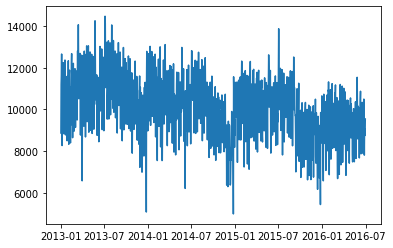

In [35]:
##Building Time Series Graphs

#number of arrests made in CA on each day
Time_series = df.groupby('stop_date').agg('count').iloc[:,0] 

#builds a date range starting at 2013-01-01
x = pd.date_range('2013-01-01',periods=len(Time_series)) 

plt.plot(x,Time_series) 


From the Time Series graph, we see some interesting fluctuations that seem periodic. To investigate further, let's narrow down the time frame of our graph.

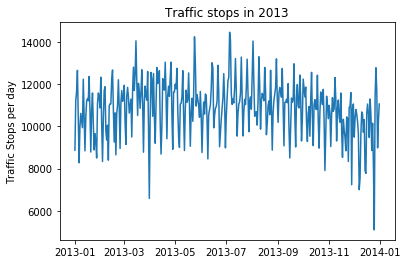

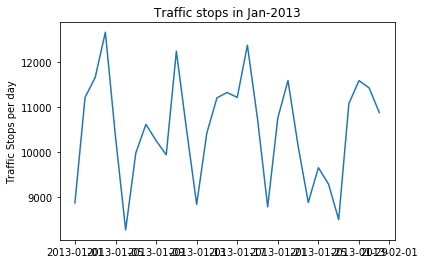

In [36]:
#Building Time Series Graph for 2013
plt.figure()
Time_series = df[:'2013'].groupby('stop_date').agg('count').iloc[:,0] 
x = pd.date_range('2013-01-01',periods=len(Time_series)) 
plt.plot(x,Time_series), plt.title('Traffic stops in 2013'), plt.ylabel('Traffic Stops per day')
plt.show()

#Building Time Series Graph for January 2013
plt.figure()
Time_series = df['2013-01'].groupby('stop_date').agg('count').iloc[:,0] 
x = pd.date_range('2013-01-01',periods=len(Time_series))
plt.plot(x,Time_series), plt.title('Traffic stops in Jan-2013'), plt.ylabel('Traffic Stops per day')
plt.show()

In [43]:
Time_series = df['2013-01'].groupby('stop_date').agg('count').iloc[:,0] 

We've constructed Time Series graphs for 2013 and January 2013. We can see that the periodic variations are mostly on a what appear to be a weekly basis. It would not be unreasonable to think that cops make more stops on certain days of the week than others. Let's test that hypothesis by finding the total number of traffic stops made on each day of the week over 2013 and summarize it with a bar graph.

(<matplotlib.axes._subplots.AxesSubplot at 0x2123c3bfb00>,
 Text(0.5, 1.0, 'Traffic Stops in California in Janaury 2013'))

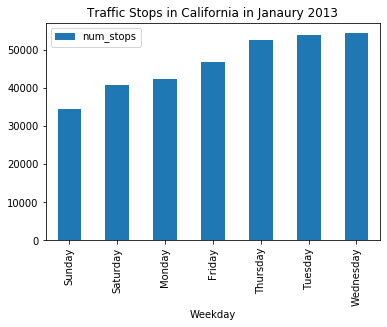

In [5]:
##Break it down into days of the week-January 2013
Jan = pd.DataFrame(df['2013-01'].groupby('stop_date').agg('count').iloc[:,0])
#convert date to name of weekday
Jan.index = Jan.index.weekday_name
Jan.columns = ['num_stops']
Jan.index.name = 'Weekday'
#rank by number of arrests on each day
Jan.sort_values(by='num_stops')
#total number of arrests in January by days of week
Jan.groupby('Weekday').agg('sum').sort_values(by='num_stops')
#bar plot of arrests by weekday
Jan.groupby('Weekday').agg('sum').sort_values(by='num_stops').plot.bar(), plt.title('Traffic Stops in California in Janaury 2013')

Wow! Cops in California made 50% more arrests on Tuesday through Thursday compared to Sunday during January 2013. Why don't we see if this trend holds up for the entire dataset

(<matplotlib.axes._subplots.AxesSubplot at 0x2123d4a84e0>,
 Text(0.5, 1.0, 'Traffic Stops in CA 2013 onwards'))

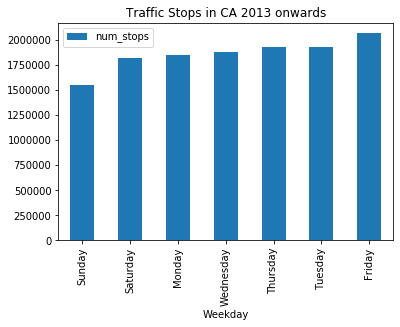

In [6]:
## Repeat the same time-series analysis for the entire dataset

#Count the total number of traffic stops made on each day
Weekday = pd.DataFrame(df.groupby('stop_date').agg('count').iloc[:,0])

#change the Weekday df index to the name of the weekday rather than the date
Weekday.index = Weekday.index.weekday_name

#Renaming columns and index
Weekday.columns = ['num_stops']
Weekday.index.name = 'Weekday'

#sort dataframe based on number of arrests on each day of the week
Weekday.sort_values(by='num_stops')

#total number of arrests in January by days of week
Weekday.groupby('Weekday').agg('sum').sort_values(by='num_stops')

#bar plot of arrests by weekday
Weekday.groupby('Weekday').agg('sum').sort_values(by='num_stops').plot.bar(), plt.title('Traffic Stops in CA 2013 onwards')

Even when examining the entire dataset, we still see that many more arrests are made during the weekdays than on Sunday. As the past few cells have shown, Panda's Dataframes comes with a vast array of tools to manipulate and query data. We can then summarize and visualize our analyses using Time Series and Bar Graphs in Matplotlib, using only a few lines of code

##**4. Introducing Search Rate and Hit Rate**
To determine if there are racial disparities in traffic stops, we will utilize two commonly used tests: the benchmark and outcome tests. Simply put, the Benchmark tests examines the proportion of stopped cars that are then searched i.e. the search rate, as broken down by race. The Outcome Test then looks at the the proportion of *searched cars* that actually end up having contraband i.e. the hit rate, as broken down by race. We would expect that if racial profiling of minorities exists, then minorities would have a higher search rate than their white peers and a lower or comparable hit rate as their white peers.

However, as discussed by the same Stanford academics who brought you this dataset, the Benchmark and Outcome tests are not rigorous tests of discrimination and can be fooled by the problem of *infra-marginality*.  The infra-marginal problem arises in discrimination testing when different population groups have different underlying probability distributions. As discussed in [their paper](https://5harad.com/papers/threshold-test.pdf), different signal distributions of the liklihood of posessing contraband for different populations can lead to misleading results from the benchmark and outcome tests. 

More broadly, it is important as Data Scientists to consider possible external factors. For instance, if african americans in a certain county commit a disproportionate amount of drug crimes, then it might be reasonable that african americans are stopped at a higher rate-though the legality of doing so is dubious. Given the sensitive nature of the topic, it would be foolish to draw conclusions from the analysis in this kernel alone. Instead, we will simply use this dataset as practice for plotting and analyzing data in Python. 

First, lets examine the search and hit rate by race for the entirety of California. 

(<matplotlib.axes._subplots.AxesSubplot at 0x2123d531470>,
 Text(0, 0.5, 'Hit Rate(%)'),
 Text(0.5, 0, 'Driver Race'),
 Text(0.5, 1.0, 'Hit Rate in California by Driver Race'))

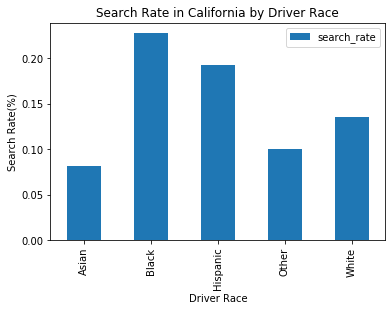

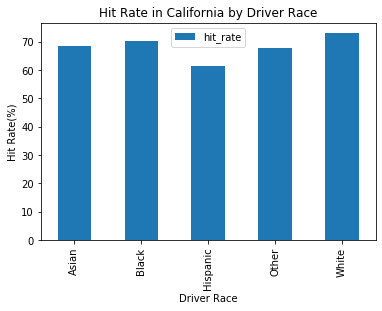

In [7]:
##Analyzing Search Rate and Hit Rate by Race for California
#creating a dataframe with driver race as index
Data_race = df.groupby('driver_race').agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})
Data_race.columns = ['stop_count','search_conducted','contraband_found']
Data_race['search_rate'] = (Data_race.loc[:,'search_conducted']/Data_race.loc[:,'stop_count'])*100
Data_race['hit_rate'] = (Data_race.loc[:,'contraband_found']/Data_race.loc[:,'search_conducted'])*100

Data_race.iloc[:,[0,3,4]]

#Plotting Search Rate and Hit Rate by Race for California
Data_race.iloc[:,[3]].plot.bar(), plt.ylabel('Search Rate(%)'), plt.xlabel('Driver Race'), plt.title('Search Rate in California by Driver Race')
Data_race.iloc[:,[4]].plot.bar(), plt.ylabel('Hit Rate(%)'), plt.xlabel('Driver Race'), plt.title('Hit Rate in California by Driver Race')

In [48]:
df['state'].value_counts()

CA    13031552
Name: state, dtype: int64

##**5. Comparing California Traffic Stops with North Carolina Traffic Stops, Multiple Bar Graphs**

One interesting line of investigation is to compare search and hit rates between states. Thankfully, [Stanford researchers have already analyzed North Carolina Policing Data](https://5harad.com/papers/threshold-test.pdf) to find their Search and Hit Rates. Let's compare the Search and Hit Rates for North Carolina with those of California

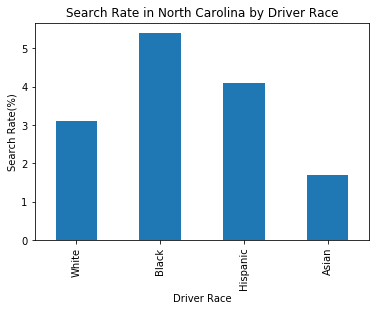

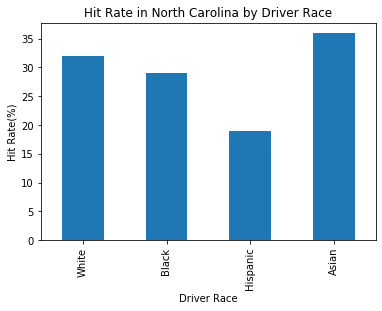

,search_rate,hit_rate
White,3.1,32
Black,5.4,29
Hispanic,4.1,19
Asian,1.7,36


In [8]:
#North Carolina Data
d = {'search_rate': [3.1, 5.4, 4.1, 1.7],'hit_rate': [32, 29, 19, 36]}
NC = pd.DataFrame(d,index=['White', 'Black', 'Hispanic', 'Asian'],columns=['search_rate','hit_rate'])

#Plotting Search Rate and Hit Rate by Race for North Carolina
NC.loc[:,'search_rate'].plot.bar(), plt.ylabel('Search Rate(%)'), plt.xlabel('Driver Race')
plt.title('Search Rate in North Carolina by Driver Race'), plt.show()

NC.loc[:,'hit_rate'].plot.bar(), plt.ylabel('Hit Rate(%)'), plt.xlabel('Driver Race')
plt.title('Hit Rate in North Carolina by Driver Race'), plt.show()
NC

<Figure size 432x288 with 0 Axes>

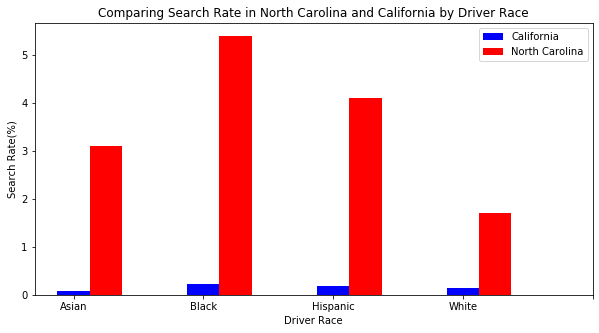

In [9]:
#Plotting Search Rates of CA and NC
plt.figure()

#creating positions of each bar
pos = list(range(len(NC)))

#set width of each bar
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))

#Create bars for California Data
plt.bar(np.array(pos), #position of bars
        Data_race.loc[['Asian','Black','Hispanic','White'],'search_rate'], #Removed "Others" b/c not included in NC data
        # of width
        width,
        # color of CA bars
        color='blue')
#Create bars for North Carolina Data
plt.bar(np.array([p + width for p in pos]), #position of bars shifted over to avoid overlap
        NC['search_rate'],
        # of width
        width,
        # color of NC bars
        color='red')

plt.ylabel('Search Rate(%)')
plt.xlabel('Driver Race')
plt.legend(['California','North Carolina'])
plt.title('Comparing Search Rate in North Carolina and California by Driver Race')
plt.xticks([0,1,2,3,4],['Asian','Black','Hispanic','White'])
plt.show()

One of the issues with multiple bar graphs is that it is difficult to compare data with large differences in magnitude. After we plot the CA and NC traffic stop search rates by race, we can clearly see that California police are much less likely to search a car than in North Carolina. However, because the North Carolina search rate is so much higher, it stretches out the y-axis of the graph, making it difficult to compare racial differences in the CA data. For example, it is clear to us that blacks are searched much more often in North Carolina than other racial groups, but does the same trend hold true in CA? If so, to what degree? Those kinds of questions are harder to answer with multiple bar graphs.

<Figure size 432x288 with 0 Axes>

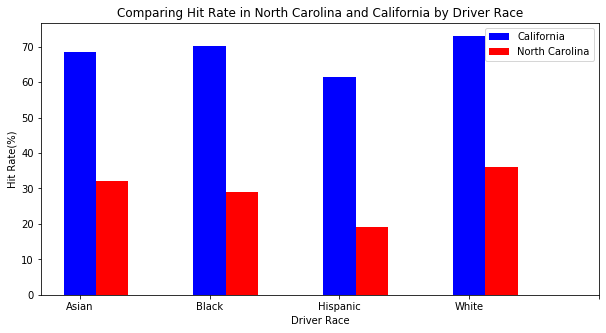

In [10]:
#Plotting Hit Rates of CA and NC
plt.figure()

#creating positions of each bar
pos = list(range(len(NC)))

#set width of each bar
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))

#Create bars for California Data
plt.bar(np.array(pos), #position of bars
        Data_race.loc[['Asian','Black','Hispanic','White'],'hit_rate'], #Removed "Others" b/c not included in NC data
        # of width
        width,
        # color of CA bars
        color='blue')
#Create bars for North Carolina Data
plt.bar(np.array([p + width for p in pos]), #position of bars shifted over to avoid overlap
        NC['hit_rate'],
        # of width
        width,
        # color of NC bars
        color='red')

plt.ylabel('Hit Rate(%)')
plt.xlabel('Driver Race')
plt.legend(['California','North Carolina'])
plt.xticks([0,1,2,3,4],['Asian','Black','Hispanic','White'])
plt.title('Comparing Hit Rate in North Carolina and California by Driver Race')
plt.show()

When examining hit rates, we see that CA traffic stops have much higher hit rates than NC's. But this should make sense, because North Carolina police search more cars in general. For states with a high search rate, we would expect a lower hit rate, because there is a lower threshold for searching(unless if there are drastic differences in terms of gun/drug crimes between states, a possible underlying variable that isn't considered). We can also see that in both states, searches of hispanic drivers tends to be much less sucessful than searches of other drivers.


##**6. Search and Hit Rates in California by Race and County, MultiIndexing and Scatterplots**

Next, lets examine the search and hit rate by county and by race for California. To ensure statistical rigor, we'll remove any counties that have found contraband less than 5 times for any racial group over the timeframe of our dataset. 

In [11]:
#Analyzing Search Rate and Hit Rate by Race and County for California
Data = df.groupby(['county_name','driver_race']).agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})

Data.columns = ['stop_count','search_conducted','contraband_found']

Data['search_rate'] = (Data.loc[:,'search_conducted']/Data.loc[:,'stop_count'])*100

Data['hit_rate'] = (Data.loc[:,'contraband_found']/Data.loc[:,'search_conducted'])*100

#Removing smaller counties with less than 5 successful contraband hits
for county, row, in Data.groupby(level=0):
    if ((row.loc[:,'contraband_found']<5).any())==True:
        Data.drop(county,inplace=True)
    elif (row.xs(county,level=0).loc[:,'contraband_found'].empty)==True:
        continue
    else:
        continue
        
Data.iloc[:,[0,3,4]]

stop_count  search_rate   hit_rate
county_name    driver_race                                    
Alameda County Asian             99385     0.064396  70.312500
               Black            129753     0.311361  61.386139
               Hispanic         202449     0.144234  67.465753
               Other            111535     0.066347  64.864865
               White            264481     0.122126  64.705882
...                                ...          ...        ...
Trinity County Asian               463     1.295896  83.333333
               Black               287    12.891986  91.891892
               Hispanic            739     4.871448  75.000000
               Other               678     1.917404  92.307692
               White             18327     0.954875  82.285714

[115 rows x 3 columns]

To examine how racial disparities in search rates for each counties, we will plot their search rates of whites against their search rates of minorities in a scatterplot. In each scatterplot, we will plot a 45 deg line, which is where most counties should lie if there is no difference in search rates between whites and minorities. Thus, if a county lies far above the line, it is much more likely to search blacks than whites. 

(Text(0.5, 0, 'White Search Rate(%)'),
 Text(0, 0.5, 'Asian Search Rate(%)'),
 [])

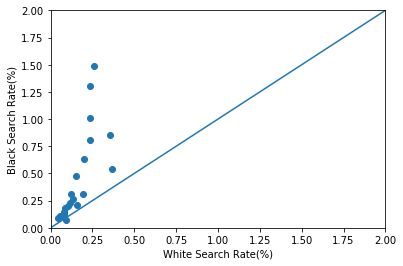

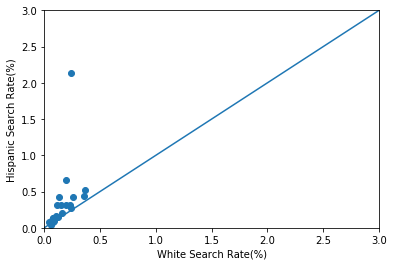

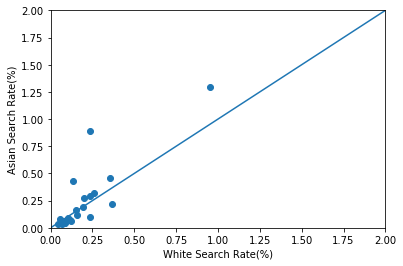

In [12]:
##Graphing Search rates
#Blacks
plt.figure()
plt.scatter(Data.xs('White',level=1).loc[:,'search_rate'],
            Data.xs('Black',level=1).loc[:,'search_rate'])
plt.ylim(0,2),plt.xlim(0,2),plt.plot([0,3],[0,3]),
plt.xlabel('White Search Rate(%)'),plt.ylabel('Black Search Rate(%)'),plt.plot()

#Hispanics
plt.figure()
plt.scatter(Data.xs('White',level=1).loc[:,'search_rate'],
            Data.xs('Hispanic',level=1).loc[:,'search_rate'])
plt.ylim(0,3), plt.xlim(0,3), plt.plot([0,3],[0,3]),
plt.xlabel('White Search Rate(%)'),plt.ylabel('Hispanic Search Rate(%)'),plt.plot()

#Asians
plt.figure()
plt.scatter(Data.xs('White',level=1).loc[:,'search_rate'],
            Data.xs('Asian',level=1).loc[:,'search_rate'])
plt.ylim(0,2), plt.xlim(0,2), plt.plot([0,3],[0,3]),
plt.xlabel('White Search Rate(%)'),plt.ylabel('Asian Search Rate(%)'),plt.plot()


The controvery between Black Lives Matters and allegations of "racist cops" makes it difficult to separate political narrative from fact. By using data science and visualizations, we can tease apart the data to find the truth underlying it. Based on the benchmark test, it would seem that most counties lie around the line of equality. When comparing Blacks and Hispanics however, there is one county that lies far away from the pack with much larger search rates than of minorities than white, by a factor of roughly 6 and 5 times respectively. Let's see if we can't find which county it is.

In [13]:
#Identifying Outlier County
#We can use idxmax for search rates of blacks because in every case,
#the county that is farthest away from the equality line also has the highest search rate of blacks
Outlier_black_search = [Data.xs('Black',level=1)['search_rate'].idxmax()]
Outlier_hispanic_search = [Data.xs('Hispanic',level=1)['search_rate'].idxmax()]
print(Outlier_black_search,Outlier_hispanic_search)


['Trinity County'] ['Trinity County']


Interestingly enough, the same county is an outlier for Black and Hispanic search rates. Let's examine scatterplots of the hit rates for blacks, hispanics, and asians and highlight Trinity County in the scatterplot to see if it is an outlier in hit rates as well.
For hit rates, if a county lies far below the equality line, then it may suggest that police are searching minorities too often, as whites would have higher rates and vice versa.

((0, 100),
 (0, 100),
 Text(0.5, 0, 'White Search Rate'),
 Text(0, 0.5, 'Asian Search Rate'))

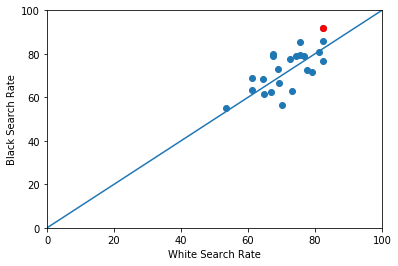

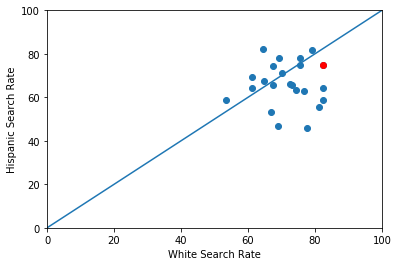

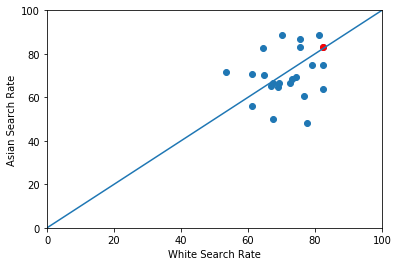

In [14]:
##Hit rates
#White-Black
plt.figure()
plt.scatter(Data.xs('White',level=1).loc[:,'hit_rate'],
            Data.xs('Black',level=1).loc[:,'hit_rate']),
#highlighting Trinity County on the Scatterplot
plt.scatter(Data.loc[('Trinity County','White'),'hit_rate'],
            Data.loc[('Trinity County','Black'),'hit_rate'],color='red')
plt.xlim(0,100),plt.ylim(0,100), plt.plot([0,100],[0,100]), plt.xlabel('White Search Rate'), plt.ylabel('Black Search Rate')

#White-Hispanics
plt.figure()
plt.scatter(Data.xs('White',level=1).loc[:,'hit_rate'],
            Data.xs('Hispanic',level=1).loc[:,'hit_rate'])
#highlighting Trinity County on the Scatterplot
plt.scatter(Data.loc[('Trinity County','White'),'hit_rate'],
            Data.loc[('Trinity County','Hispanic'),'hit_rate'],color='red')
plt.ylim(0,100), plt.xlim(0,100), plt.plot([0,100],[0,100]), plt.xlabel('White Search Rate'), plt.ylabel('Hispanic Search Rate')

#White-Asians
plt.figure()
plt.scatter(Data.xs('White',level=1).loc[:,'hit_rate'],
            Data.xs('Asian',level=1).loc[:,'hit_rate'])
#highlighting Trinity County on the Scatterplot
plt.scatter(Data.loc[('Trinity County','White'),'hit_rate'],
            Data.loc[('Trinity County','Asian'),'hit_rate'],color='red')
plt.ylim(0,100), plt.xlim(0,100), plt.plot([0,100],[0,100]), plt.xlabel('White Search Rate'), plt.ylabel('Asian Search Rate')

There are no clear outliers when examining hit rates. We can see that Trinity County has pretty much equitable hit rates between whites and minorities. Again, it is difficult to draw conclusions about racial discrimination based solely on benchmark and outcome testing. What we can conclude is that the majority of counties have very similar search and hit rates for minorities and whites, except in the case of Trinity County.